# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sklearn
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Load Dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/arvin0711/Kuliah-ADD/main/luas-panen-sayuran.csv")
df.head()

,TANAMAN,JENIS,KODE PROVINSI (BPS),PROVINSI,TAHUN,LUAS PANEN (HA),PRODUKSI (KWINTAL),PRODUKTIVITAS
0,Bawang Daun,Sayuran,11,ACEH,2021,195.90,12799.00,65.33
1,Bawang Daun,Sayuran,12,SUMATERA UTARA,2021,1947.52,156324.77,80.27
2,Bawang Daun,Sayuran,13,SUMATERA BARAT,2021,4096.47,441485.05,107.77
3,Bawang Daun,Sayuran,14,RIAU,2021,0.50,10.00,20.00
4,Bawang Daun,Sayuran,15,JAMBI,2021,538.96,44361.03,82.31


# PreProcessing Data

Ubah Semua Nilai Pada Kolom Provinsi menjadi Huruf Kecil

In [ ]:
df['PROVINSI'] = df['PROVINSI'].str.lower()

In [ ]:
df.shape

(4420, 8)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4420 entries, 0 to 4419
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TANAMAN              4420 non-null   object 
 1   JENIS                4420 non-null   object 
 2   KODE PROVINSI (BPS)  4420 non-null   int64  
 3   PROVINSI             4420 non-null   object 
 4   TAHUN                4420 non-null   int64  
 5   LUAS PANEN (HA)      4420 non-null   float64
 6   PRODUKSI (KWINTAL)   4420 non-null   float64
 7   PRODUKTIVITAS        4420 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 276.4+ KB


In [ ]:
df.describe()

,KODE PROVINSI (BPS),TAHUN,LUAS PANEN (HA),PRODUKSI (KWINTAL)
count,4420.000000,4420.000000,4.420000e+03,4.420000e+03
mean,47.558824,2020.000000,6.194132e+03,1.805684e+05
std,26.111541,1.414374,9.736490e+04,7.027740e+05
min,11.000000,2018.000000,0.000000e+00,0.000000e+00
25%,19.000000,2019.000000,1.100000e+01,2.552500e+02
50%,51.500000,2020.000000,2.951250e+02,1.480961e+04
75%,72.000000,2021.000000,1.329250e+03,8.477649e+04
max,94.000000,2022.000000,3.602113e+06,1.772078e+07


In [ ]:
df.isnull().sum()

TANAMAN                0
JENIS                  0
KODE PROVINSI (BPS)    0
PROVINSI               0
TAHUN                  0
LUAS PANEN (HA)        0
PRODUKSI (KWINTAL)     0
PRODUKTIVITAS          0
dtype: int64

In [ ]:
df.dropna()

,TANAMAN,JENIS,KODE PROVINSI (BPS),PROVINSI,TAHUN,LUAS PANEN (HA),PRODUKSI (KWINTAL),PRODUKTIVITAS
0,Bawang Daun,Sayuran,11,aceh,2021,195.90,12799.00,65.33
1,Bawang Daun,Sayuran,12,sumatera utara,2021,1947.52,156324.77,80.27
2,Bawang Daun,Sayuran,13,sumatera barat,2021,4096.47,441485.05,107.77
3,Bawang Daun,Sayuran,14,riau,2021,0.50,10.00,20.00
4,Bawang Daun,Sayuran,15,jambi,2021,538.96,44361.03,82.31
...,...,...,...,...,...,...,...,...
4415,Melon,Buah,76,sulawesi barat,2018,0.00,0.00,-
4416,Melon,Buah,81,maluku,2018,27.00,2110.00,78.15
4417,Melon,Buah,82,maluku utara,2018,15.00,226.00,15.07
4418,Melon,Buah,91,papua barat,2018,56.00,698.00,12.46


In [ ]:
mean_produksi_by_tanaman = df.groupby('TANAMAN')['PRODUKSI (KWINTAL)'].sum().sort_values(ascending=False)
mean_produksi_by_tanaman

TANAMAN
Jamur                         9.790327e+07
Bawang Merah                  8.886075e+07
Kubis                         7.166441e+07
Cabai Rawit                   7.149102e+07
Kentang                       6.747244e+07
Tomat                         5.365239e+07
Cabai Besar                   3.685344e+07
Petsai/Sawi                   3.444253e+07
Wortel                        3.393176e+07
Terung                        3.113200e+07
Bawang Daun                   3.010147e+07
Labu Siam                     2.351723e+07
Semangka                      2.347438e+07
Mentimun                      2.227179e+07
Cabai Keriting                1.877567e+07
Kacang Panjang                1.826599e+07
Kangkung                      1.568260e+07
Buncis                        1.556040e+07
Cabai Besar/ Tw / Teropong    9.588254e+06
Kembang Kol                   9.356730e+06
Bayam                         8.221205e+06
Melon                         6.268168e+06
Bawang Putih                  2.855947e+06
Kac

In [ ]:
sum_produksi_by_tanaman = df.groupby(by='TANAMAN')['LUAS PANEN (HA)'].sum().sort_values(ascending=False)
sum_produksi_by_tanaman

TANAMAN
Jamur                         1.416499e+07
Jamur Tiram                   4.347287e+06
Jamur Merang                  2.220793e+06
Cabai Rawit                   8.894066e+05
Bawang Merah                  8.824328e+05
Jamur Lainnya                 6.623156e+05
Cabai Besar                   4.047593e+05
Kentang                       3.510406e+05
Kubis                         3.294022e+05
Petsai/Sawi                   3.263974e+05
Bawang Daun                   3.104267e+05
Tomat                         2.890119e+05
Kangkung                      2.753755e+05
Kacang Panjang                2.557926e+05
Terung                        2.364845e+05
Bayam                         2.136728e+05
Mentimun                      2.045714e+05
Wortel                        1.929348e+05
Cabai Keriting                1.783681e+05
Semangka                      1.566708e+05
Buncis                        1.216483e+05
Cabai Besar/ Tw / Teropong    1.095270e+05
Kembang Kol                   7.295265e+04
Lab

In [ ]:
df.groupby(by='TANAMAN')['PRODUKSI (KWINTAL)'].sum().sort_values(ascending=False)


TANAMAN
Jamur                         9.790327e+07
Bawang Merah                  8.886075e+07
Kubis                         7.166441e+07
Cabai Rawit                   7.149102e+07
Kentang                       6.747244e+07
Tomat                         5.365239e+07
Cabai Besar                   3.685344e+07
Petsai/Sawi                   3.444253e+07
Wortel                        3.393176e+07
Terung                        3.113200e+07
Bawang Daun                   3.010147e+07
Labu Siam                     2.351723e+07
Semangka                      2.347438e+07
Mentimun                      2.227179e+07
Cabai Keriting                1.877567e+07
Kacang Panjang                1.826599e+07
Kangkung                      1.568260e+07
Buncis                        1.556040e+07
Cabai Besar/ Tw / Teropong    9.588254e+06
Kembang Kol                   9.356730e+06
Bayam                         8.221205e+06
Melon                         6.268168e+06
Bawang Putih                  2.855947e+06
Kac

In [ ]:
df.groupby(by='PROVINSI')['PRODUKSI (KWINTAL)'].sum().sort_values(ascending=False)

PROVINSI
jawa barat                   1.819155e+08
jawa timur                   1.513004e+08
jawa tengah                  1.327228e+08
sumatera utara               6.455291e+07
sumatera barat               4.983108e+07
sulawesi selatan             2.771376e+07
nusa tenggara barat          2.359165e+07
sulawesi utara               2.289246e+07
bengkulu                     2.007908e+07
jambi                        1.796901e+07
bali                         1.367171e+07
aceh                         1.295012e+07
lampung                      1.042433e+07
sumatera selatan             7.910870e+06
sulawesi tengah              6.417898e+06
nusa tenggara timur          5.984232e+06
riau                         5.631225e+06
kalimantan selatan           4.953983e+06
kalimantan timur             4.786890e+06
banten                       4.595833e+06
di yogyakarta                3.851506e+06
papua                        2.993689e+06
di.yogyakarta                2.865326e+06
kalimantan barat         

In [ ]:
df.groupby(by='PROVINSI')['LUAS PANEN (HA)'].sum().sort_values(ascending=False)

PROVINSI
jawa barat                   1.528713e+07
jawa timur                   4.396826e+06
jawa tengah                  2.918925e+06
sumatera selatan             4.834084e+05
sumatera utara               4.314606e+05
lampung                      4.009275e+05
sumatera barat               3.293753e+05
sulawesi selatan             3.196117e+05
nusa tenggara barat          2.467845e+05
bengkulu                     2.175670e+05
di yogyakarta                1.930290e+05
banten                       1.843434e+05
sulawesi utara               1.835909e+05
di.yogyakarta                1.755080e+05
bali                         1.732182e+05
jambi                        1.591519e+05
riau                         1.520269e+05
kalimantan selatan           1.456699e+05
sulawesi tengah              1.190698e+05
aceh                         1.185374e+05
sulawesi barat               1.065397e+05
kalimantan barat             9.401478e+04
kalimantan timur             9.187302e+04
nusa tenggara timur      

Provinsi dengan Produksi teratas

In [ ]:
top_produksi_by_provinsi = df.groupby('PROVINSI').agg({
    'LUAS PANEN (HA)': 'sum',  # Sum 'LUAS PANEN (HA)' within each group
    'PRODUKSI (KWINTAL)': 'sum'  # Sum 'PRODUKSI (KWINTAL)' within each group
}).sort_values(by='PRODUKSI (KWINTAL)', ascending=False)

# Resetting the index for a cleaner output
top_produksi_by_provinsi.reset_index(inplace=True)
top_produksi_by_provinsi.head()

,PROVINSI,LUAS PANEN (HA),PRODUKSI (KWINTAL)
0,jawa barat,1.528713e+07,1.819155e+08
1,jawa timur,4.396826e+06,1.513004e+08
2,jawa tengah,2.918925e+06,1.327228e+08
3,sumatera utara,4.314606e+05,6.455291e+07
4,sumatera barat,3.293753e+05,4.983108e+07


Provinsi dengan Luas Lahan teratas

In [ ]:
top_luas_by_provinsi = df.groupby('PROVINSI').agg({
    'LUAS PANEN (HA)': 'sum',  # Sum 'LUAS PANEN (HA)' within each group
    'PRODUKSI (KWINTAL)': 'sum'  # Sum 'PRODUKSI (KWINTAL)' within each group
}).sort_values(by='LUAS PANEN (HA)', ascending=False)

# Resetting the index for a cleaner output
top_luas_by_provinsi.reset_index(inplace=True)
top_luas_by_provinsi.head(10)

,PROVINSI,LUAS PANEN (HA),PRODUKSI (KWINTAL)
0,jawa barat,1.528713e+07,1.819155e+08
1,jawa timur,4.396826e+06,1.513004e+08
2,jawa tengah,2.918925e+06,1.327228e+08
3,sumatera selatan,4.834084e+05,7.910870e+06
4,sumatera utara,4.314606e+05,6.455291e+07
5,lampung,4.009275e+05,1.042433e+07
6,sumatera barat,3.293753e+05,4.983108e+07
7,sulawesi selatan,3.196117e+05,2.771376e+07
8,nusa tenggara barat,2.467845e+05,2.359165e+07
9,bengkulu,2.175670e+05,2.007908e+07


In [ ]:
bottom_produksi_by_provinsi = df.copy()  # Create a copy of the DataFrame to avoid modifying the original
bottom_produksi_by_provinsi['PROVINSI'] = bottom_produksi_by_provinsi['PROVINSI'].str.lower()  # Convert 'PROVINSI' to lowercase

bottom_produksi_by_provinsi = bottom_produksi_by_provinsi.groupby('PROVINSI').agg({
    'LUAS PANEN (HA)': 'sum',  # Sum 'LUAS PANEN (HA)' within each group
    'PRODUKSI (KWINTAL)': 'sum'  # Sum 'PRODUKSI (KWINTAL)' within each group
}).sort_values(by='PRODUKSI (KWINTAL)', ascending=True).head(5)

# Resetting the index for a cleaner output
bottom_produksi_by_provinsi.reset_index(inplace=True)
bottom_produksi_by_provinsi

,PROVINSI,LUAS PANEN (HA),PRODUKSI (KWINTAL)
0,kep. riau,4554.319999,3.163154e+05
1,kep. bangka belitung,5111.800015,3.227897e+05
2,dki jakarta,7816.019999,5.262624e+05
3,sulawesi barat,106539.730000,7.717228e+05
4,kepulauan bangka belitung,17196.970001,1.075148e+06


### Korelasi Antar Kolom

In [ ]:
#Reviewing Correlation between attributes
correlations = df.corr(method='pearson')
print(correlations)

                     KODE PROVINSI (BPS)         TAHUN  LUAS PANEN (HA)  \
KODE PROVINSI (BPS)         1.000000e+00  4.709430e-15        -0.034223   
TAHUN                       4.709430e-15  1.000000e+00        -0.004678   
LUAS PANEN (HA)            -3.422284e-02 -4.677822e-03         1.000000   
PRODUKSI (KWINTAL)         -1.367738e-01 -1.064018e-02         0.671591   

                     PRODUKSI (KWINTAL)  
KODE PROVINSI (BPS)           -0.136774  
TAHUN                         -0.010640  
LUAS PANEN (HA)                0.671591  
PRODUKSI (KWINTAL)             1.000000  


In [ ]:
# hubungan antara luas panen dengan produksi
df["LUAS PANEN (HA)"].corr(df["PRODUKSI (KWINTAL)"])

0.6715911292820885

In [ ]:
#Review Skew of attribute Distribution
print(df.skew())


KODE PROVINSI (BPS)     0.054589
TAHUN                   0.000000
LUAS PANEN (HA)        30.867436
PRODUKSI (KWINTAL)     13.178681
dtype: float64


<Axes: >

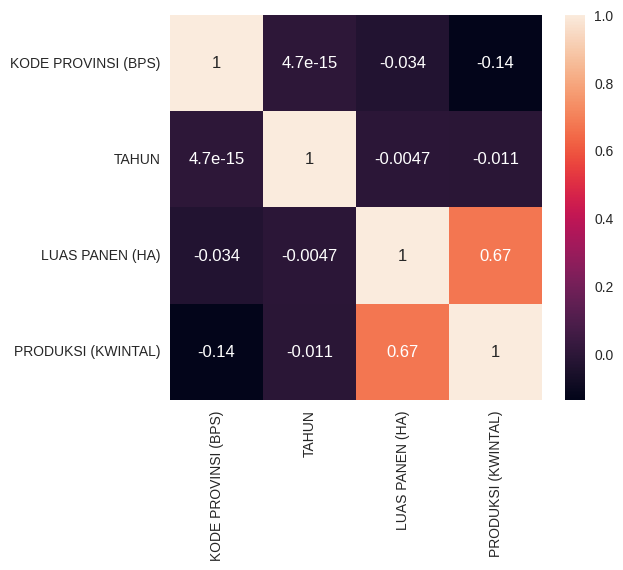

In [ ]:
plt.figure(figsize = (6,5))

sns.heatmap(df.corr(), annot =True)

Dari Heatmap korelasi tersebut, dapat diketahui bahwa variabel yang paling berpngaruh terhadapa PRODUKSI (KWINTAL) adalah variabel LUAS PANEN (HA)

### Deteksi Outlier

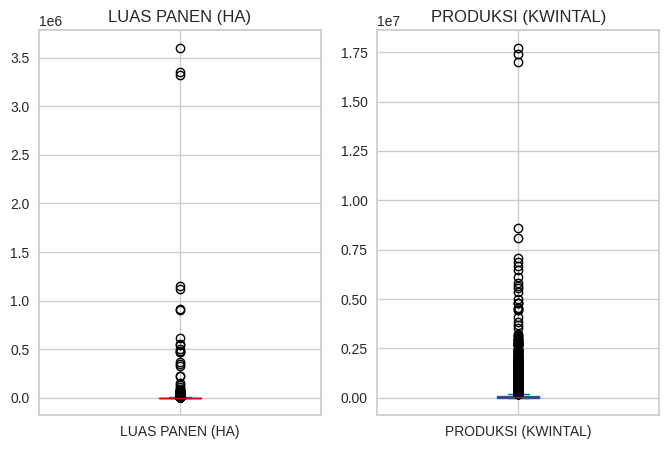

In [ ]:
#  kolom yang ingin dideteksi outliernya
ratio_data = ['LUAS PANEN (HA)', 'PRODUKSI (KWINTAL)']

# Membuat satu gambar dengan subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

# Iterasi melalui kolom-kolom yang akan diplot
for i, data in enumerate(ratio_data):
    # Membuat boxplot dalam subplot
    df[data].plot(kind='box', ax=axes[i])
    axes[i].set_title(data)
# Menampilkan gambar
plt.show()


In [ ]:
# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers(df, columns):
    outliers = pd.DataFrame()
    for column in columns:
        # Hitung IQR untuk kolom saat ini
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        #  batas bawah dan batas atas untuk mendeteksi outlier
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Deteksi outlier dan tambahkan ke DataFrame outliers
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]


    # Pindahkan kolom 'PROVINSI' ke sebelah kanan
    provinsi_column = df.pop('PROVINSI')
    outliers['PROVINSI'] = provinsi_column

    return outliers


In [ ]:
# Panggil fungsi untuk mendeteksi outlier pada kolom yang dipilih
outliers_df = detect_outliers(df, ratio_data)

# Tampilkan outlier
print("Outliers dari dataset ini adalah:")
print(outliers_df)

Outliers dari dataset ini adalah:
      LUAS PANEN (HA)  PRODUKSI (KWINTAL)        PROVINSI
2             4096.47           441485.05  sumatera barat
11           11966.75          1670076.70      jawa barat
12           13121.30          1305558.80     jawa tengah
14            9729.20           980085.00      jawa timur
24            8481.25           814689.70  sulawesi utara
...               ...                 ...             ...
4196          3649.00           239414.00      jawa timur
4227          4186.00           298102.00      jawa barat
4262          3696.00           576174.00     jawa tengah
4264          8195.00          1267482.00      jawa timur
4366          3781.00           491307.00      jawa timur

[491 rows x 3 columns]


In [ ]:
outliers_df.shape

(491, 3)

In [ ]:
outliers_df

,LUAS PANEN (HA),PRODUKSI (KWINTAL),PROVINSI
2,4096.47,441485.05,sumatera barat
11,11966.75,1670076.70,jawa barat
12,13121.30,1305558.80,jawa tengah
14,9729.20,980085.00,jawa timur
24,8481.25,814689.70,sulawesi utara
...,...,...,...
4196,3649.00,239414.00,jawa timur
4227,4186.00,298102.00,jawa barat
4262,3696.00,576174.00,jawa tengah
4264,8195.00,1267482.00,jawa timur


In [ ]:
outliers_df.groupby(by='PROVINSI')['LUAS PANEN (HA)'].count().sort_values(ascending=False).head(10)

PROVINSI
jawa barat             88
jawa timur             78
jawa tengah            73
sumatera utara         42
sumatera barat         34
sulawesi selatan       28
sulawesi utara         17
sulawesi barat         16
nusa tenggara barat    14
lampung                11
Name: LUAS PANEN (HA), dtype: int64

In [ ]:
outliers_df.groupby(by='PROVINSI')['PRODUKSI (KWINTAL)'].sum().sort_values(ascending=False).head(10)

PROVINSI
jawa barat             1.722228e+08
jawa timur             1.409019e+08
jawa tengah            1.173951e+08
sumatera utara         4.996143e+07
sumatera barat         3.587651e+07
nusa tenggara barat    1.600516e+07
sulawesi selatan       1.488743e+07
sulawesi utara         1.091206e+07
jambi                  8.617006e+06
aceh                   6.617329e+06
Name: PRODUKSI (KWINTAL), dtype: float64

In [ ]:
outliers_df.groupby(by='PROVINSI')['LUAS PANEN (HA)'].sum().sort_values(ascending=False).head(10)

PROVINSI
jawa barat             1.525153e+07
jawa timur             4.324858e+06
jawa tengah            2.822987e+06
sumatera selatan       3.999816e+05
sumatera utara         3.017764e+05
lampung                2.823380e+05
sumatera barat         2.242853e+05
sulawesi selatan       1.977539e+05
nusa tenggara barat    1.940943e+05
di yogyakarta          1.683591e+05
Name: LUAS PANEN (HA), dtype: float64

### Hapus Outlier

In [ ]:
# Fungsi untuk mendeteksi dan menghapus outlier menggunakan IQR
def remove_outliers(df, columns):
    for column in columns:
        # Hitung IQR untuk kolom saat ini
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Tentukan batas bawah dan batas atas untuk mendeteksi outlier
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Dapatkan indeks baris yang mengandung outlier
        outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index

        # Hapus baris dengan outlier dari DataFrame
        df.drop(outlier_indices, inplace=True)

In [ ]:
# Panggil fungsi untuk menghapus outlier pada kolom yang dipilih
remove_outliers(df, ratio_data)
# Menampilkan DataFrame setelah menghapus outlier
print("DataFrame setelah menghapus outlier:")
print(df)


DataFrame setelah menghapus outlier:
          TANAMAN    JENIS  KODE PROVINSI (BPS)  TAHUN  LUAS PANEN (HA)  \
0     Bawang Daun  Sayuran                   11   2021           195.90   
3     Bawang Daun  Sayuran                   14   2021             0.50   
4     Bawang Daun  Sayuran                   15   2021           538.96   
5     Bawang Daun  Sayuran                   16   2021           392.73   
7     Bawang Daun  Sayuran                   18   2021           644.50   
...           ...      ...                  ...    ...              ...   
4415        Melon     Buah                   76   2018             0.00   
4416        Melon     Buah                   81   2018            27.00   
4417        Melon     Buah                   82   2018            15.00   
4418        Melon     Buah                   91   2018            56.00   
4419        Melon     Buah                   94   2018           190.00   

      PRODUKSI (KWINTAL) PRODUKTIVITAS  
0               12799

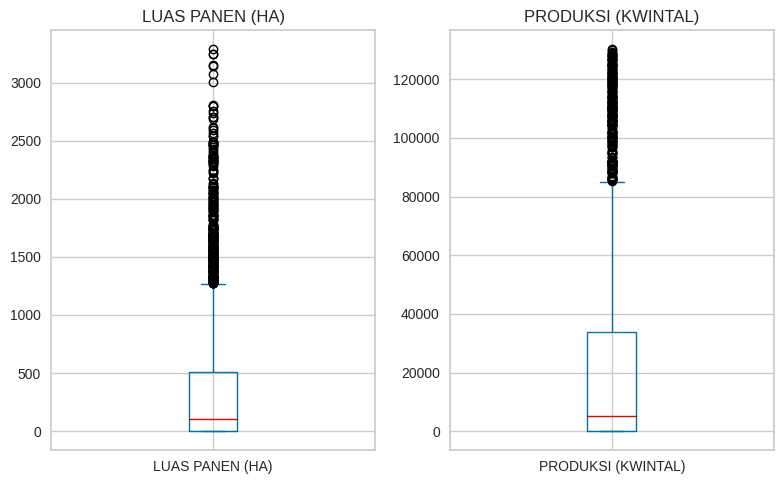

In [ ]:
ratio_data = ['LUAS PANEN (HA)', 'PRODUKSI (KWINTAL)']

# Membuat satu gambar dengan subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

# Iterasi melalui kolom-kolom yang akan diplot
for i, data in enumerate(ratio_data):
    # Membuat boxplot dalam subplot
    df[data].plot(kind='box', ax=axes[i])
    axes[i].set_title(data)

# Mengatur tata letak subplot
plt.tight_layout()

# Menampilkan gambar
plt.show()

In [ ]:
'''import matplotlib.pyplot as plt

ratio_data = ['LUAS PANEN (HA)', 'PRODUKSI (KWINTAL)']

# Membuat satu gambar dengan subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Iterasi melalui kolom-kolom yang akan diplot
for i, data in enumerate(ratio_data):
    # Membuat boxplot dalam subplot
    df[data].plot(kind='box', ax=axes[i])
    axes[i].set_title(data)

# Mengatur tata letak subplot
plt.tight_layout()

# Menampilkan gambar
plt.show()'''

"import matplotlib.pyplot as plt\n\nratio_data = ['LUAS PANEN (HA)', 'PRODUKSI (KWINTAL)']\n\n# Membuat satu gambar dengan subplot\nfig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))\n\n# Iterasi melalui kolom-kolom yang akan diplot\nfor i, data in enumerate(ratio_data):\n    # Membuat boxplot dalam subplot\n    df[data].plot(kind='box', ax=axes[i])\n    axes[i].set_title(data)\n\n# Mengatur tata letak subplot\nplt.tight_layout()\n\n# Menampilkan gambar\nplt.show()"

In [ ]:
df.head()

,TANAMAN,JENIS,KODE PROVINSI (BPS),TAHUN,LUAS PANEN (HA),PRODUKSI (KWINTAL),PRODUKTIVITAS
0,Bawang Daun,Sayuran,11,2021,195.90,12799.00,65.33
3,Bawang Daun,Sayuran,14,2021,0.50,10.00,20.00
4,Bawang Daun,Sayuran,15,2021,538.96,44361.03,82.31
5,Bawang Daun,Sayuran,16,2021,392.73,30993.79,78.92
7,Bawang Daun,Sayuran,18,2021,644.50,39636.95,61.50


In [ ]:
X = df.iloc[:, -3].values
y = df.iloc[:, -2].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
# Reshape the 1D arrays to 2D arrays
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [ ]:
# Display results
lengths = {
    'X_train': len(X_train),
    'y_train': len(y_train),
    'X_test': len(X_test),
    'y_test': len(y_test)
}

# Convert lengths to a Pandas DataFrame
lengths_df = pd.DataFrame.from_dict(lengths, orient='index', columns=['Length'])

print(lengths_df)


         Length
X_train    2429
y_train    2429
X_test     1042
y_test     1042


In [ ]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse


def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [ ]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

In [ ]:
# Assuming X_train, X_test, y_train, y_test are your training and testing sets
# and evaluation function is already defined

# Reshape the 1D arrays to 2D arrays
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

def rmse_cv(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

models = pd.DataFrame(columns=["Model", "MAE", "MSE", "RMSE", "R2 Score", "RMSE (Cross-Validation)"])

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-" * 30)
rmse_cross_val = rmse_cv(lin_reg, X_train, y_train)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression", "MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 13311.065159663318
MSE: 433562559.1909249
RMSE: 20822.165093739048
R2 Score: 0.5783381867692086
------------------------------
RMSE Cross-Validation: 20417.18357933751


In [ ]:

def rmse_cv(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse

# Create and train the Random Forest Regressor model
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)

# Make predictions
predictions = random_forest.predict(X_test)

# Evaluate the model
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-" * 30)

# Calculate RMSE using cross-validation
rmse_cross_val = rmse_cv(random_forest, X_train, y_train)
print("RMSE Cross-Validation:", rmse_cross_val)

# Append results to the models DataFrame
new_row = {"Model": "RandomForestRegressor", "MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 12665.080506477769
MSE: 504204378.57247955
RMSE: 22454.495731868028
R2 Score: 0.5096353963208494
------------------------------
RMSE Cross-Validation: 21847.33137993626


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3471 entries, 0 to 4419
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TANAMAN              3471 non-null   object 
 1   JENIS                3471 non-null   object 
 2   KODE PROVINSI (BPS)  3471 non-null   int64  
 3   TAHUN                3471 non-null   int64  
 4   LUAS PANEN (HA)      3471 non-null   float64
 5   PRODUKSI (KWINTAL)   3471 non-null   float64
 6   PRODUKTIVITAS        3471 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 216.9+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3471 entries, 0 to 4419
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TANAMAN              3471 non-null   object 
 1   JENIS                3471 non-null   object 
 2   KODE PROVINSI (BPS)  3471 non-null   int64  
 3   TAHUN                3471 non-null   int64  
 4   LUAS PANEN (HA)      3471 non-null   float64
 5   PRODUKSI (KWINTAL)   3471 non-null   float64
 6   PRODUKTIVITAS        3471 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 216.9+ KB


 # regresi linier sederhana

In [ ]:
df.shape

(3471, 7)

In [ ]:
X = df['LUAS PANEN (HA)']
y = df['PRODUKSI (KWINTAL)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
# Display results
lengths = {
    'X_train': len(X_train),
    'y_train': len(y_train),
    'X_test': len(X_test),
    'y_test': len(y_test)
}

# Convert lengths to a Pandas DataFrame
lengths_df = pd.DataFrame.from_dict(lengths, orient='index', columns=['Length'])

print(lengths_df)


         Length
X_train    2429
y_train    2429
X_test     1042
y_test     1042


In [ ]:
import statsmodels.api as sm
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const              6020.870253
LUAS PANEN (HA)      42.745177
dtype: float64

In [ ]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:     PRODUKSI (KWINTAL)   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     2988.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:20:51   Log-Likelihood:                -27554.
No. Observations:                2429   AIC:                         5.511e+04
Df Residuals:                    2427   BIC:                         5.512e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            6020.8703    497.403     

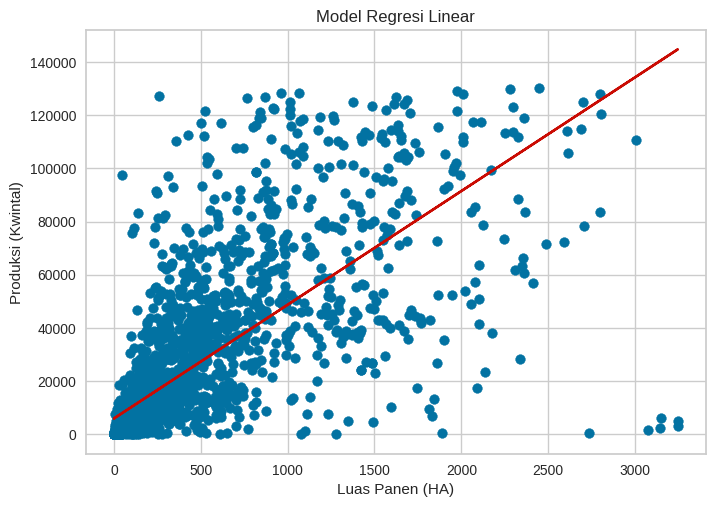

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6020.87 + 42.74*X_train, 'r')

#  label sumbu x dan y
plt.xlabel('Luas Panen (HA)')
plt.ylabel('Produksi (Kwintal)')

# judul
plt.title('Model Regresi Linear')
plt.show()

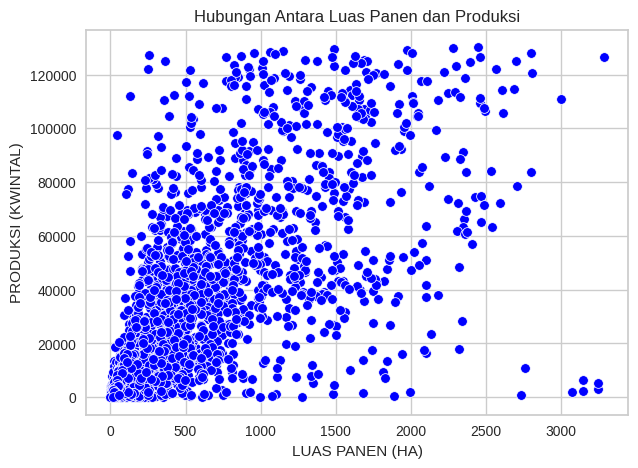

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='LUAS PANEN (HA)', y='PRODUKSI (KWINTAL)', data=df, color='blue')
plt.title('Hubungan Antara Luas Panen dan Produksi')
plt.grid(True)
plt.show()

# Clustering

In [ ]:
from sklearn.cluster import KMeans
import yellowbrick
from yellowbrick.style import set_palette
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import DBSCAN

In [ ]:
df_c = df.drop(columns = ['TANAMAN', 'JENIS', 'KODE PROVINSI (BPS)','TAHUN','PRODUKTIVITAS'])
df_c

,LUAS PANEN (HA),PRODUKSI (KWINTAL)
0,195.90,12799.00
3,0.50,10.00
4,538.96,44361.03
5,392.73,30993.79
7,644.50,39636.95
...,...,...
4415,0.00,0.00
4416,27.00,2110.00
4417,15.00,226.00
4418,56.00,698.00


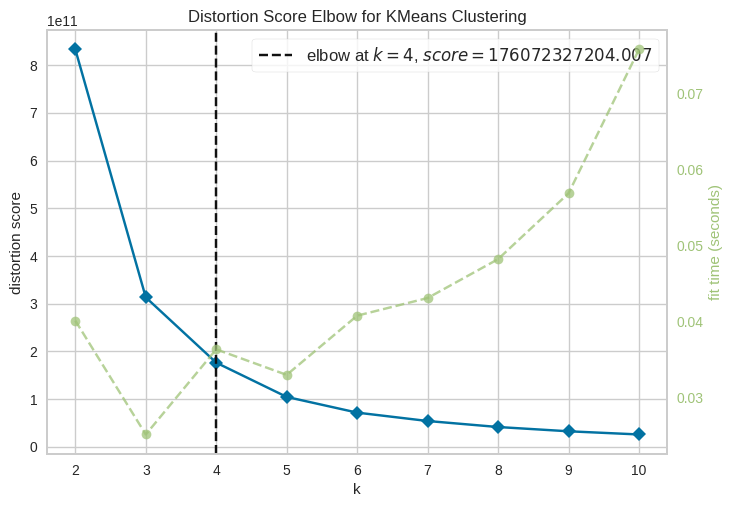

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = yellowbrick.cluster.KElbowVisualizer(KMeans()) # def k = 10

model.fit(df_c)
model.show()

<Axes: xlabel='LUAS PANEN (HA)', ylabel='PRODUKSI (KWINTAL)'>

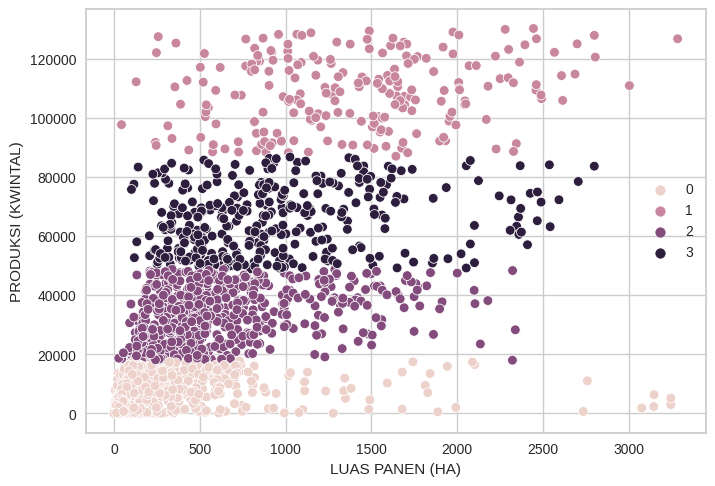

In [ ]:
clustering = sklearn.cluster.KMeans(n_clusters = 4)
clustering.fit(df_c)

sns.scatterplot(data = df_c, x = 'LUAS PANEN (HA)', y = 'PRODUKSI (KWINTAL)', hue = clustering.labels_)

In [ ]:
df_f = df.copy()
df_f = df.groupby(by='TAHUN')['LUAS PANEN (HA)'].sum()
df_f

TAHUN
2018    255878.000000
2019    265635.750000
2020    262657.580004
2021    241220.010000
2022    241670.600003
Name: LUAS PANEN (HA), dtype: float64

### Load Dataset Pendukung

In [ ]:
df2 = pd.read_csv("https://raw.githubusercontent.com/arvin0711/Kuliah-ADD/main/hujan%20provinsi.csv")
df2 = df2.rename(columns={'Nama Wilayah': 'PROVINSI'})
df2['PROVINSI'] = df2['PROVINSI'].str.lower()
df2.head()

,Kode Wilayah,PROVINSI,Curah Hujan (mm)
0,11,aceh,"2293,40"
1,12,sumatera utara,"2543,40"
2,13,sumatera barat,"5332,30"
3,14,riau,"3111,70"
4,15,jambi,"3218,40"


In [ ]:
df2.isnull().sum()

Kode Wilayah        0
PROVINSI            0
Curah Hujan (mm)    0
dtype: int64

In [ ]:
df2.shape

(34, 3)

In [ ]:
df2.describe()

,Kode Wilayah
count,34.000000
mean,47.500000
std,26.397027
min,11.000000
25%,19.500000
50%,51.500000
75%,71.750000
max,92.000000


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Kode Wilayah      34 non-null     int64 
 1   PROVINSI          34 non-null     object
 2   Curah Hujan (mm)  34 non-null     object
dtypes: int64(1), object(2)
memory usage: 944.0+ bytes


In [ ]:
# Mengubah kolom-kolom menjadi tipe data float
df2['Curah Hujan (mm)'] = df2['Curah Hujan (mm)'].str.replace(',', '.').astype(float)


# Pivot / Penggabungan dua dataframe

In [ ]:
result_df = pd.merge(top_luas_by_provinsi, df2, on='PROVINSI')
result_df.head()

,PROVINSI,LUAS PANEN (HA),PRODUKSI (KWINTAL),Kode Wilayah,Curah Hujan (mm)
0,jawa barat,1.528713e+07,1.819155e+08,32,3786.6
1,jawa timur,4.396826e+06,1.513004e+08,35,2447.8
2,jawa tengah,2.918925e+06,1.327228e+08,33,2476.8
3,sumatera selatan,4.834084e+05,7.910870e+06,16,2598.2
4,sumatera utara,4.314606e+05,6.455291e+07,12,2543.4


# Deteksi Outlier Dataset Pendukung

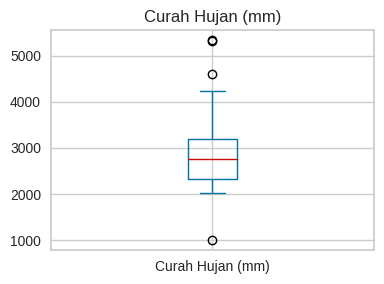

In [ ]:
ratio_data = ['Curah Hujan (mm)']

# Membuat satu gambar dengan subplot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 3))

# Iterasi melalui kolom-kolom yang akan diplot
for data in ratio_data:
    # Membuat boxplot dalam subplot
    result_df[data].plot(kind='box', ax=axes)
    axes.set_title(data)

# Mengatur tata letak subplot
plt.tight_layout()

# Menampilkan gambar
plt.show()

In [ ]:
# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers(result_df, columns):
    outliers = pd.DataFrame()
    for column in columns:
        # Hitung IQR untuk kolom saat ini
        Q1 = result_df[column].quantile(0.25)
        Q3 = result_df[column].quantile(0.75)
        IQR = Q3 - Q1

        #  batas bawah dan batas atas untuk mendeteksi outlier
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Deteksi outlier dan tambahkan ke DataFrame outliers
        outliers[column] = result_df[(result_df[column] < lower_bound) | (result_df[column] > upper_bound)][column]


    # Pindahkan kolom 'PROVINSI' ke sebelah kanan
    provinsi_column = result_df.pop('PROVINSI')
    outliers['PROVINSI'] = provinsi_column

    return outliers


In [ ]:
# Panggil fungsi untuk mendeteksi outlier pada kolom yang dipilih
outliers_df = detect_outliers(result_df, ratio_data)

# Tampilkan outlier
print("Outliers dari dataset ini adalah:")
print(outliers_df)

Outliers dari dataset ini adalah:
    Curah Hujan (mm)         PROVINSI
6             5332.3   sumatera barat
12            4596.1   sulawesi utara
17            1000.8  sulawesi tengah
26            5307.4           maluku


# Korelasi antar atribut Dataset Pendukung

In [ ]:
result_df["Curah Hujan (mm)"].corr(result_df["PRODUKSI (KWINTAL)"])

0.10780403764673192